In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=data.iloc[:,[3,4]].values


In [4]:
import scipy.cluster.hierarchy as sch

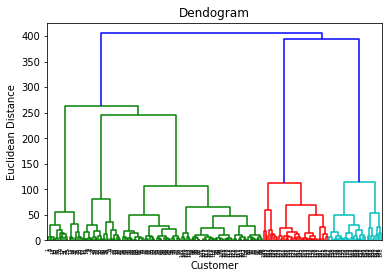

In [5]:
den=sch.dendrogram(sch.linkage(x,method='ward'))
plt.xlabel("Customer")
plt.ylabel('Euclidean Distance')
plt.title("Dendogram")
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage='ward') 
y=hc.fit_predict(x)

In [8]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

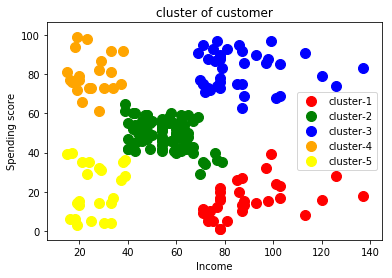

In [9]:
plt.scatter(x[y==0,0],x[y==0,1],s=100,c='red',label="cluster-1")
plt.scatter(x[y==1,0],x[y==1,1],s=100,c='green',label="cluster-2")
plt.scatter(x[y==2,0],x[y==2,1],s=100,c='blue',label="cluster-3")
plt.scatter(x[y==3,0],x[y==3,1],s=100,c='orange',label="cluster-4")
plt.scatter(x[y==4,0],x[y==4,1],s=100,c='yellow',label="cluster-5")
plt.xlabel("Income")
plt.ylabel("Spending score")
plt.title("cluster of customer")
plt.legend()
plt.show()

In [10]:
data['Cluster']=y
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [11]:
mask=data["Cluster"]==0
data[mask].head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
128,129,Male,59,71,11,0
130,131,Male,47,71,9,0
134,135,Male,20,73,5,0
136,137,Female,44,73,7,0
138,139,Male,19,74,10,0


In [13]:
finalDf_agg = pd.concat([data, pd.DataFrame({'cluster':hc.labels_})], axis = 1)
finalDf_agg.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,cluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,4,4


In [18]:
from sklearn.decomposition import PCA
import seaborn as sns

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(2)

,principal component 1,principal component 2
0,-46.903574,1.099247
1,-35.924389,41.638826


In [22]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf_agg,palette=['red','blue','green','yellow'])
plt.show()

ValueError: Could not interpret input 'principal component 1'

<Figure size 1080x720 with 0 Axes>